In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import os
from zipfile import ZipFile

In [2]:
!gdown 1JBN-6FYKXuKZkLAIvOLrk322E27TEP6r

with ZipFile(file="/content/dataset-resized-up.zip", mode='r') as zObject:
    zObject.extractall()

Downloading...
From (original): https://drive.google.com/uc?id=1JBN-6FYKXuKZkLAIvOLrk322E27TEP6r
From (redirected): https://drive.google.com/uc?id=1JBN-6FYKXuKZkLAIvOLrk322E27TEP6r&confirm=t&uuid=6cf8325b-6f6c-47fc-909d-efe54039bd91
To: /content/dataset-resized-up.zip
100% 42.9M/42.9M [00:00<00:00, 47.7MB/s]


In [3]:
data_path = "/content/dataset-resized"

In [12]:
# Iterate through data_path folder
items_per_subfolder = {}
items = 0

for root, folder, files in os.walk(data_path):
    sub_folder_name = os.path.basename(root)
    items += len(files)
    if sub_folder_name != "dataset-resized":
      items_per_subfolder[sub_folder_name] = len(files)

print(items_per_subfolder)
print(f"total_items = {items}")

{'glass': 501, 'metal': 410, 'plastic': 482, 'cardboard': 403, 'paper': 594, 'trash': 137}
total_items = 2527


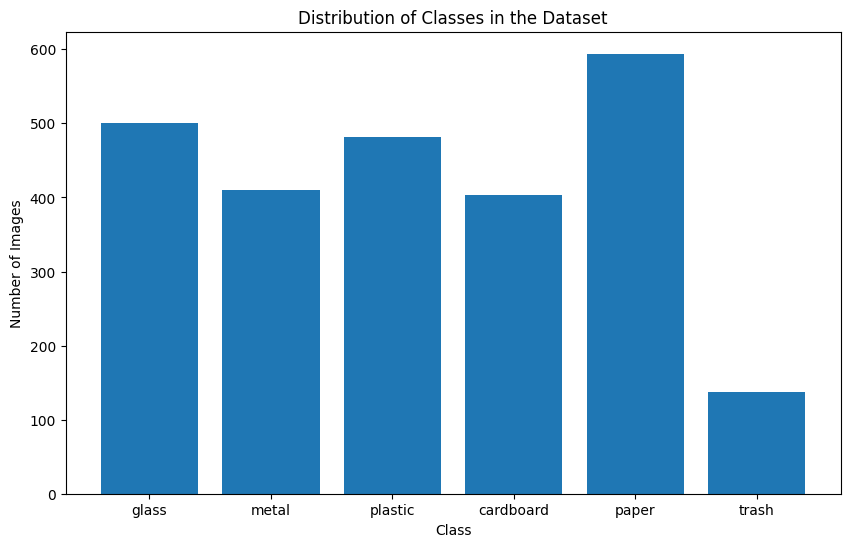

In [13]:
# Create lists for the classes and their respective counts
category = list(items_per_subfolder.keys())
counts = list(items_per_subfolder.values())

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(category, counts)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Distribution of Classes in the Dataset')
plt.show()

the number of total dataset is 2527, and it can be seen that ```trash``` has the smallest proportion than the others. This can cause an imbalance issues and with this small dataset it might have poor performance for Deep Learning projects.



In [17]:
total_width = 0
total_height = 0
image_count = 0

for root, folder, files in os.walk(data_path):
  for file in files:
    image_path = os.path.join(root, file)
    try:
      with Image.open(image_path) as img:
        width, height = img.size
        total_width += width
        total_height += height
        image_count += 1
    except Exception as e:
      print(f"Error opening image: {str(e)}")

if image_count > 0:
  average_width = total_width / image_count
  average_height = total_height / image_count
  print(f"Average image width: {average_width}")
  print(f"Average image height: {average_height}")
else:
  print("No images found")

Average image width: 512.0
Average image height: 384.0


all image from dataset-resized folder have a fixed size of (384,512) pixel, but in modeling process it will reduced to (224,224) pixel for faster model training and reduce resource consumption for training a larger pixel size images.